# Project: Classification and Clustering of Recipes based on Ingredients 
Britta Schmitt - January 2023

This project aims at the classification and clustering of the country origin of recipes based on the ingredients contained therein. The project is structured as follows: 

- Load data
- Do exploratory data analysis
- Build a clustering model: Analyze the similarity of recipes based on the ingredients contained therein. We use the k-modes algorithm.
- Build a classification model: We choose the country cuisine as target variable. We use two models: Logistic Regression and Decision Tree.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data 

Load data and get a first overview on the format and completeness of the contained information.


In [3]:
df_01 = pd.read_csv("Rezepte/recipes.csv")
df_02 = pd.read_csv("Rezepte/ingredients.csv")

In [4]:
df_01.head() 

,ID,cuisine
0,10259,greek
1,25693,southern_us
2,20130,filipino
3,22213,indian
4,13162,indian


In [5]:
print(df_01.shape)  # get size of data set 

(39774, 2)


In [6]:
print(df_01.isnull().sum()) # check completeness of data

ID         0
cuisine    0
dtype: int64


In [7]:
print(df_01.dtypes) # check data types

ID          int64
cuisine    object
dtype: object


In [8]:
df_02.head()

,ID_recipe,ingredients
0,10259,romaine lettuce
1,10259,black olives
2,10259,grape tomatoes
3,10259,garlic
4,10259,pepper


In [9]:
print(df_02.shape)  # check size of dataframe

(428275, 2)


In [10]:
print(df_02.isnull().sum()) # check completeness of data

ID_recipe      0
ingredients    0
dtype: int64


In [11]:
print(df_02.dtypes) # check data types

ID_recipe       int64
ingredients    object
dtype: object


**Adapt column captions to easily merge dataframes.**

In [12]:
df_01 = df_01.rename(columns={"ID":"ID_recipe"})
df_01.head()

,ID_recipe,cuisine
0,10259,greek
1,25693,southern_us
2,20130,filipino
3,22213,indian
4,13162,indian


Create one dataframe that contains all the information:

In [13]:
df = df_01.join(df_02.set_index('ID_recipe'), on = 'ID_recipe').reset_index(drop=True) #reset index to avoid all-zero index

print('\nThe new created dataframe looks as follows: \n')
print(df.head(), end="\n\n")
print(f'and has {df.shape[0]} rows and {df.shape[1]} columns.')


The new created dataframe looks as follows: 

   ID_recipe cuisine      ingredients
0      10259   greek  romaine lettuce
1      10259   greek     black olives
2      10259   greek   grape tomatoes
3      10259   greek           garlic
4      10259   greek           pepper

and has 428275 rows and 3 columns.


# 1: Exploratory Data Analysis

Examine data set for various metrics to develop understanding of included data. We consider:

- Number of recipes
- Number of country cuisines
- Number of ingredients
- Number of recipes per country cuisine
- Ingredients by frequency
- Total number of ingredients per recipe
- Number of ingredients per recipe per country

**Number of Recipes**

In [14]:
count_recipes = df.ID_recipe.unique().size
print(f'\nThe dataset contains {count_recipes} recipes.')


The dataset contains 39774 recipes.


**Number of country cuisines**

In [15]:
count_cuisines = df.cuisine.unique().size
print(f'\nThe recipes have {count_cuisines} different country origins.')


The recipes have 20 different country origins.


**Number of ingredients**

In [16]:
count_ingredients = df.ingredients.unique().size
print(f'\nThe dataset contains {count_ingredients} different ingredients.')


The dataset contains 6714 different ingredients.


**Number of recipes per country cuisine**

Group the ID info for each country cuisine and count the number of IDs. 
Then sort the list by descending ID count.

In [17]:
recipes_per_cuisine = df_01.groupby('cuisine').agg(count=('cuisine',len))
recipes_per_cuisine.sort_values(by=['count'], inplace=True, ascending=False)

print(recipes_per_cuisine.head())
print('\nMost of the recipes are recipes from the country cuisine ' + str(recipes_per_cuisine.index.values[0]) + '. In this cuisine, there are ' + str(recipes_per_cuisine.loc[recipes_per_cuisine.index.values[0]]['count']) + ' recipes in the dataset. \n')  

             count
cuisine           
italian       7838
mexican       6438
southern_us   4320
indian        3003
chinese       2673

Most of the recipes are recipes from the country cuisine italian. In this cuisine, there are 7838 recipes in the dataset. 




The distribution of recipes per country cuisine can be represented as follows.


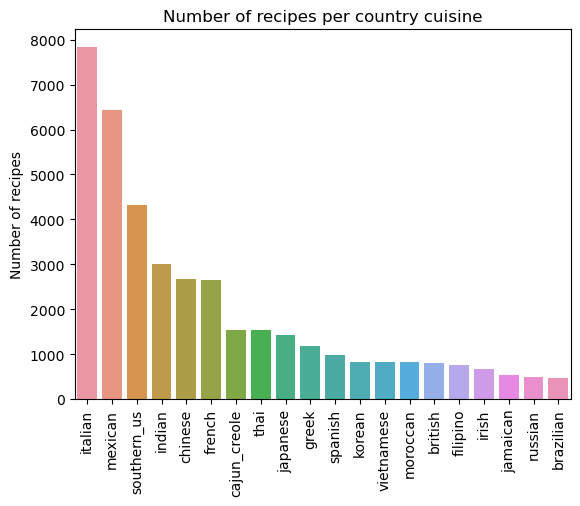

In [18]:
print('\nThe distribution of recipes per country cuisine can be represented as follows.')
x_val = recipes_per_cuisine.index.values
ax = sns.barplot(x=x_val, y=recipes_per_cuisine['count']);
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.ylabel('Number of recipes') ;
plt.title('Number of recipes per country cuisine');

**Ingredients by frequency**

First find out the frequency of all ingredients contained. Then sort in descending order and get an overview by means of some plot.

In [19]:
quantities_ingredients = df.groupby('ingredients').agg(count=('ingredients', len)) # Häufigkeiten der einzelnen Zutaten
quantities_ingredients.sort_values(by=['count'], inplace=True, ascending=False) # use inplace to prevent copying whole dataset
print(quantities_ingredients.head(20))

first = quantities_ingredients.index.values[0]
print('\nThe ingredient appearing most frequently in all recipes is ' + str(quantities_ingredients.index.values[0]) + ' and appears ' + str(quantities_ingredients.loc[quantities_ingredients.index.values[0]]['count']) + ' times in the dataset.\n')

                     count
ingredients               
salt                 18049
olive oil             7972
onions                7972
water                 7457
garlic                7380
sugar                 6434
garlic cloves         6237
butter                4848
ground black pepper   4785
all-purpose flour     4632
pepper                4438
vegetable oil         4385
eggs                  3388
soy sauce             3296
kosher salt           3113
green onions          3078
tomatoes              3058
large eggs            2948
carrots               2814
unsalted butter       2782

The ingredient appearing most frequently in all recipes is salt and appears 18049 times in the dataset.



**General complexity of recipes**

In [20]:
number_of_ing = df.groupby('ID_recipe').agg(count=('ID_recipe',len))
print(number_of_ing)

           count
ID_recipe       
0             11
1             18
2             18
3             11
4              4
...          ...
49712         10
49713         15
49714         13
49716         22
49717         20

[39774 rows x 1 columns]


Text(0.5, 1.0, 'Complexity distribution of recipes based on number of ingredients')

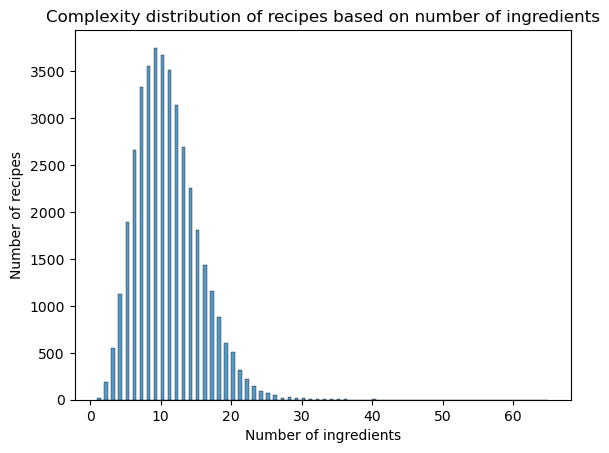

In [21]:
range_max = number_of_ing['count'].max()
range_min = number_of_ing['count'].min()

sns.histplot(data=number_of_ing, x=number_of_ing['count'], binwidth=0.5, binrange=(int(range_min),int(range_max)))
plt.ylabel('Number of recipes')
plt.xlabel('Number of ingredients')
plt.title('Complexity distribution of recipes based on number of ingredients')

In [22]:
compl_mean = round(number_of_ing['count'].mean(),2) #mean
compl_median = round(number_of_ing['count'].median(),2) #median
compl_std = round(number_of_ing['count'].std(),2) #standard deviation
compl_var = round(number_of_ing['count'].var(),2) 

print('\nThe average number of ingredients in all recipes is ' + str(compl_mean))
print('\nThe median of all recipes is ' + str(compl_median)) #half of recipes consists of less then median ingredients
print('\nThe standard deviation of the data is ' + str(compl_std)) #Im Mittel weicht Anzahl Zutaten um 4.43 von 10 ab
print('\nDie variance is ' + str(compl_var)) 


The average number of ingredients in all recipes is 10.77

The median of all recipes is 10.0

The standard deviation of the data is 4.43

Die variance is 19.62


**Recipes complexity by country cuisine**

In [23]:
df_3 = df.groupby(['ID_recipe', 'cuisine']).count()
df_3 = df_3.reset_index()
df_3.head()

,ID_recipe,cuisine,ingredients
0,0,spanish,11
1,1,mexican,18
2,2,french,18
3,3,chinese,11
4,4,italian,4


Do some visualization

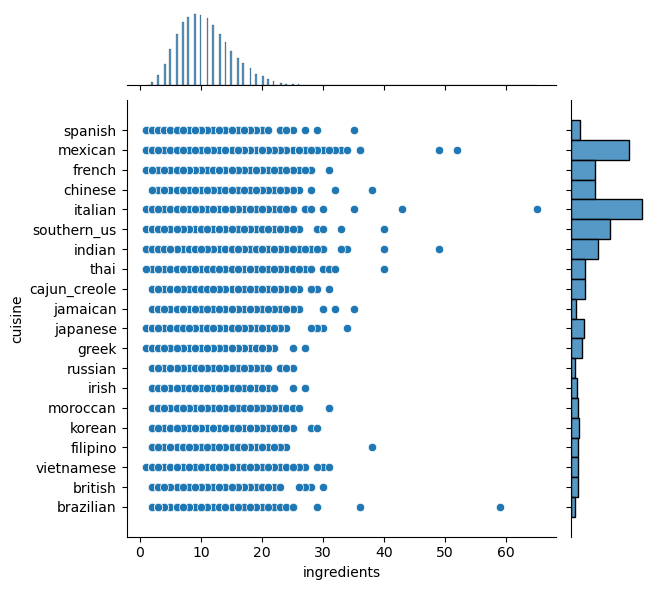

In [24]:
#via Jointplot:
ax_1 = sns.jointplot(x=df_3['ingredients'], y=df_3['cuisine'])

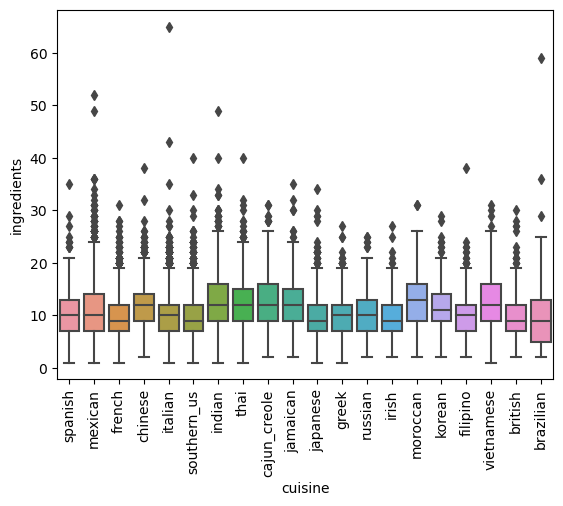

In [25]:
#via Boxplot:
ax_2 = sns.boxplot(x=df_3['cuisine'],y=df_3['ingredients'])
for item in ax_2.get_xticklabels():
    item.set_rotation(90)

# 2: Quality of data

Examine given data for quality. We choose the following aspects: 

- Completeness
- Duplicates 
- Uniqueness of ingredient names

**Completeness**

Check data for missing values (NaN):

In [26]:
print(df.isnull().sum())

ID_recipe      0
cuisine        0
ingredients    0
dtype: int64


**Uniqueness**

Check data for duplicates:

In [27]:
df.head()

,ID_recipe,cuisine,ingredients
0,10259,greek,romaine lettuce
1,10259,greek,black olives
2,10259,greek,grape tomatoes
3,10259,greek,garlic
4,10259,greek,pepper


In [28]:
num_dupl = df.duplicated().sum()
print(f'\nThere are {num_dupl} duplicates in the data.\n')


There are 26 duplicates in the data.



Consequence: We decide to exclude the duplicates from the data. Here we keep the line that appears first in each case.

In [29]:
df = df.drop_duplicates(keep='first')
print(f'Now there are {df.duplicated().sum()} duplicates contained in the data.')

Now there are 0 duplicates contained in the data.


Check data for uniqueness of ingredient names

In [30]:
for ingr_name in quantities_ingredients.head(1500).index: 
    df.loc[df['ingredients'].str.contains(ingr_name), 'ingredients'] = ingr_name 

Compare the ingredient frequency before and after the double designation search:

In [31]:
quantities_ingredients_old = quantities_ingredients

quantities_ingredients = df.groupby('ingredients').agg(count=('ingredients', len)) # quantites of single ingredients
quantities_ingredients.sort_values(by=['count'], inplace=True, ascending=False) # use inplace to prevent copying whole dataset

quantities_ingredients_old.head(15)

,count
ingredients,
salt,18049
olive oil,7972
onions,7972
water,7457
garlic,7380
sugar,6434
garlic cloves,6237
butter,4848
ground black pepper,4785


In [32]:
quantities_ingredients.head(15)

,count
ingredients,
pepper,27704
salt,27640
oil,23517
garlic,18706
sugar,12494
sauce,12402
onions,12341
cheese,11603
chicken,11100


In [33]:
count_ingredients_old = count_ingredients
count_ingredients = df.ingredients.unique().size
print(f'\nIn the original data frame there are {count_ingredients_old} different ingredients.')
print(f'\nAfter getting rid of double designations, there are {count_ingredients} different ingredients contained in the dataset.')


In the original data frame there are 6714 different ingredients.

After getting rid of double designations, there are 2273 different ingredients contained in the dataset.


Perform a full duplicate search again:


In [34]:
num_dupl_2 = df.duplicated().sum()
print(f'\nNow there are {num_dupl_2} duplicates contained in the dataset.\n')


Now there are 32611 duplicates contained in the dataset.



In [35]:
df = df.drop_duplicates(keep='first')
print(f'Now there are {df.duplicated().sum()} cuplicates contained in the dataset.')

Now there are 0 cuplicates contained in the dataset.


Do comparison:

In [36]:
print(f'Original number of ingredients: {count_ingredients_old}')
print(f'Original number of recipes: {count_recipes}')
print(f'Original number of country cuisines: {count_cuisines}')

Original number of ingredients: 6714
Original number of recipes: 39774
Original number of country cuisines: 20


In [37]:
count_recipes_new = df.ID_recipe.unique().size
count_cuisines_new = df.cuisine.unique().size
print(f'Number of ingredients after adjustment: {count_ingredients}')
print(f'Number of recipes after adjustment: {count_recipes_new}')
print(f'Number of country cuisines after adjustment: {count_cuisines_new}')

Number of ingredients after adjustment: 2273
Number of recipes after adjustment: 39774
Number of country cuisines after adjustment: 20


**Additional aspects**

Treatment or removal of outlier data could further improve data quality. For this purpose, we investigate how many prescriptions are eligible for removal based on the plots above. 

In [38]:
print(df_3[df_3['ingredients'] <= 2].size)
print(df_3[df_3['ingredients'] > 27].size)

645
309


# 3: Clustering - Similarity of recipes based on the ingredients

In this section, we are interested in the information contained in the columns "Recipe ID" and "Ingredients".

To spot similarities, we take the following steps:

- Preparation of the data: Insert dummy variables, create an array.
- Run Kmodes algorithm and view/evaluate results
- Run DBSCAN algorithm and view / evaluate results
- Extract information and learning effects from the results

Basically, we are confronted with categorical data in our data frame, which cannot be evaluated numerically (without further ado). As a consequence, we start by introducing dummy variables to get information about the contained ingredients per recipe in binary form. We use the concept of "one-hot-encoding". 

In [39]:
#choose data contained in df dataframe
df_4 = df.drop(['cuisine'], axis=1)
df_4.head()

,ID_recipe,ingredients
0,10259,lettuce
1,10259,olives
2,10259,tomatoes
3,10259,garlic
4,10259,pepper


**Insert dummy variables for every ingredient**

In [40]:
ingr_dummies = pd.get_dummies(df_4.ingredients)
df_4 = pd.concat([df_4, ingr_dummies], axis=1)

As the ingredient column is not useful any longer, we drop it.

In [41]:
df_4.drop(['ingredients'], axis=1, inplace=True)
print(df_4.shape)
df_4.head()

(395638, 2274)


,ID_recipe,7 Up,Accent Seasoning,Adobo All Purpose Seasoning,Alexia Waffle Fries,Amaretti Cookies,Anaheim chile,Angostura bitters,Argo Corn Starch,Azteca Flour Tortillas,...,yuca,yucca,yucca root,yukon gold,yuzu,za'atar,zest,zinfandel,ziti,zucchini
0,10259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10259,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Now we group by the recipe ID, so that we show all ingredients in one row (so we get a vector with binary values later).

In [42]:
df_5 = df_4.groupby('ID_recipe', as_index=False).apply(lambda grp: grp.sum())
df_5.head()

,ID_recipe,7 Up,Accent Seasoning,Adobo All Purpose Seasoning,Alexia Waffle Fries,Amaretti Cookies,Anaheim chile,Angostura bitters,Argo Corn Starch,Azteca Flour Tortillas,...,yuca,yucca,yucca root,yukon gold,yuzu,za'atar,zest,zinfandel,ziti,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df_5.shape

(39774, 2274)

**Clustering**

We apply a clustering algorithm to cluster the recipes based on the ingredients contained therein. To do so, we use a k-modes algorithm.

Transform data to numpy array:

In [44]:
#df_5.drop(['cluster', 'cluster_dbscan'], axis=1, inplace=True)
X = df_5.set_index('ID_recipe').to_numpy()
print(X)
print(X.shape)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(39774, 2273)


Load k-modes module and fit model to data.


In [45]:
from kmodes.kmodes import KModes

In [46]:
X_small = X[2000:4000,:] #choose sample data

kmode_small = KModes(n_clusters=3, n_init=2, verbose=1)
kmode_small.fit(X_small)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 19277.0


KModes(n_clusters=3, n_init=1, verbose=1)

Test results:

In [47]:
Y = 99+np.zeros(X.shape[0])
Y[2000:4000] = kmode_small.predict(X[2000:4000,:])

Consider results:

In [48]:
#insert cluster prediction to dataframe
df_5['cluster'] = Y 

In [49]:
print(f"The number of recipes that are predicted to be in cluster 0 is {df_5[df_5['cluster'] == 0].shape[0]}")
print(f"The number of recipes that are predicted to be in cluster 1 is {df_5[df_5['cluster'] == 1].shape[0]}")
print(f"The number of recipes that are predicted to be in cluster 2 is {df_5[df_5['cluster'] == 2].shape[0]}")

#df_5[df_5['cluster'] == 0].shape

The number of recipes that are predicted to be in cluster 0 is 1998
The number of recipes that are predicted to be in cluster 1 is 1
The number of recipes that are predicted to be in cluster 2 is 1


In [50]:
#look up how many ingredients are in the recipe that is contained in cluster 1
df_5[df_5['cluster'] == 1].iloc[:,2:].sum(axis=1) #Anzahl Zutaten

3161    37.0
dtype: float64

In [51]:
#look up how many ingredients are in the recipe that is contained in cluster 2
df_5[df_5['cluster'] == 2].shape
df_5[df_5['cluster'] == 2].iloc[:,2:].sum(axis=1) #Anzahl Zutaten

3812    31.0
dtype: float64

Score model based on silhouette coefficient

In [52]:
from sklearn import metrics
labels = kmode_small.labels_
metrics.silhouette_score(X_small, labels, metric='hamming')

0.49180281374792123

--> The silhouette coefficient indicates that the clusters are clearly separated.

**DBSCAN - density based spatial clustering of applications with noise**

Let's compare the results to those of another clustering algorithm. 

In [53]:
from sklearn.cluster import DBSCAN
dbscan_small = DBSCAN(eps=0.1, min_samples=3, metric='hamming').fit(X_small)

In [54]:
Ydbscan = 99+np.zeros(X.shape[0])
Ydbscan[2000:4000] = dbscan_small.labels_

In [55]:
df_5['cluster_dbscan'] = Ydbscan
df_5[df_5['cluster_dbscan'] == 0].shape

(2000, 2276)

--> also here, all recipes are predicted to be in the same cluster. 

**Learning impact**

We notice that the model does not cluster, and includes in the two one-element clusters recipes with a large number of ingredients. Therefore, the clustering can be done again with adjusted dataset. To do this:

- Choose different number of clusters and passes and draw comparisons.
- Use Elbow method to choose number of clusters
- Overlapping of clusters could lead to problems
- Set up a suitable initial guess
- Ignore data outside the quartile box and suppress the influence of outliers
- Problematic selection of test data

and observe again what effect the procedure has. 

Therefore, let us check the quantile boarders of the data.

count    8.0
Name: 0.25, dtype: float64
count    13.0
Name: 0.75, dtype: float64


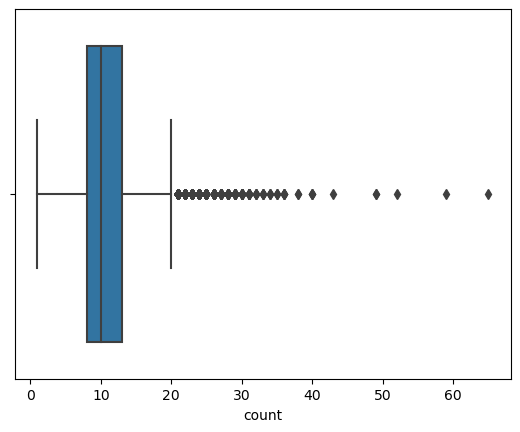

In [56]:
sns.boxplot(x=number_of_ing['count'])
print(number_of_ing.quantile(0.25))
print(number_of_ing.quantile(0.75))

# 4: Classification - Country cuisine based on ingredients

Now we classify the recipes by country cuisines. To do this, we perform the following steps:
 
 - Prepare the dataset, insert dummy variables.
 - Select feature data X and label data Y 
 - Divide data into test and training set
 - Perform classification
 - Consider and evaluate the results and the goodness of the model.
 
 We use two different data sets that differ in the number of features and labels. 
 
 We use logistic regression and a decision tree. 


## Logistic Regression

**Preparation of data**

In [57]:
df

,ID_recipe,cuisine,ingredients
0,10259,greek,lettuce
1,10259,greek,olives
2,10259,greek,tomatoes
3,10259,greek,garlic
4,10259,greek,pepper
...,...,...,...
428270,2362,mexican,garlic
428271,2362,mexican,sugar
428272,2362,mexican,tomatoes
428273,2362,mexican,celery


For simplification, we first choose only three country cuisines, that is 'italian', 'mexican', and 'chinese'.

In [58]:
Kdf_1 = df.loc[df['cuisine'].isin(['italian','mexican','chinese'])]

In [59]:
Kdf_1

,ID_recipe,cuisine,ingredients
81,3735,italian,sugar
82,3735,italian,nuts
83,3735,italian,white almond bark
84,3735,italian,flour
85,3735,italian,vanilla
...,...,...,...
428270,2362,mexican,garlic
428271,2362,mexican,sugar
428272,2362,mexican,tomatoes
428273,2362,mexican,celery


Again: insert dummy variables

In [60]:
K_ingr_dummies = pd.get_dummies(Kdf_1.ingredients)
Kdf_1 = pd.concat([Kdf_1, K_ingr_dummies], axis=1)

In [61]:
Kdf_1 = Kdf_1.drop(['ingredients'], axis=1)

In [62]:
Kdf_1 = Kdf_1.groupby('ID_recipe', as_index=False).apply(lambda grp: grp.sum())

In [63]:
Kdf_2 = Kdf_1

Insert numerical indicators for the country cuisines.

In [64]:
for abb in ['mex','it','chi']: 
    Kdf_2.loc[Kdf_2['cuisine'].str.contains(abb), 'cuisine'] = abb

In [65]:
for abb, val in [('mex', '0'),('it', '1'),('chi', '2')]: 
        Kdf_1.loc[Kdf_1['cuisine'].str.contains(abb), 'cuisine'] = val


In [66]:
Kdf_1

,ID_recipe,cuisine,7 Up,Adobo All Purpose Seasoning,Amaretti Cookies,Anaheim chile,Angostura bitters,Argo Corn Starch,Azteca Flour Tortillas,BREAKSTONE'S Sour Cream,...,yoghurt,yolk,yu choy,yuca,yukon gold,za'atar,zest,zinfandel,ziti,zucchini
0,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,30,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,18,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16944,447273,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16945,447363,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16946,347956,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16947,347963,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
Kdf_1.astype({'cuisine': 'int64'}).dtypes

ID_recipe                      int64
cuisine                        int64
7 Up                           int64
Adobo All Purpose Seasoning    int64
Amaretti Cookies               int64
                               ...  
za'atar                        int64
zest                           int64
zinfandel                      int64
ziti                           int64
zucchini                       int64
Length: 1408, dtype: object

**Choose appropriate parameters (features and labels)**

We study the most common ingredients per country cuisine (it,mex,chi) to start the classification based on them.


*Parameter for country cuisine italian*


In [68]:
Kdf_4 = df.loc[df['cuisine'].isin(['italian'])]

In [69]:
Kdf_4

,ID_recipe,cuisine,ingredients
81,3735,italian,sugar
82,3735,italian,nuts
83,3735,italian,white almond bark
84,3735,italian,flour
85,3735,italian,vanilla
...,...,...,...
428225,11462,italian,broccoli
428226,11462,italian,rotini
428227,11462,italian,olives
428228,11462,italian,Kraft Grated Parmesan Cheese


In [70]:
#print most common ingredients in the recipes for country cuisine italian.
quantities_ingredients_Kdf_4 = Kdf_4.groupby('ingredients').agg(count=('ingredients', len)) # Häufigkeiten der einzelnen Zutaten
quantities_ingredients_Kdf_4.sort_values(by=['count'], inplace=True, ascending=False) # use inplace to prevent copying whole dataset
quantities_ingredients_Kdf_4.head(20)

,count
ingredients,
salt,4906
oil,4849
pepper,4563
cheese,4143
garlic,3997
tomatoes,2362
basil,1864
parsley,1704
onions,1479


--> choose "tomatoes", "basil" and "parsley" as features for classification

*Parameter for country cuisine mexican*

In [71]:
Kdf_5 = df.loc[df['cuisine'].isin(['mexican'])]
quantities_ingredients_Kdf_5 = Kdf_5.groupby('ingredients').agg(count=('ingredients', len)) # Häufigkeiten der einzelnen Zutaten
quantities_ingredients_Kdf_5.sort_values(by=['count'], inplace=True, ascending=False) # use inplace to prevent copying whole dataset
#print(quantities_ingredients_Kdf_5.head(20))

--> choose "cilantro", "chili", and "corn" for classification

*Parameter for country cuisine chinese*

In [72]:
Kdf_6 = df.loc[df['cuisine'].isin(['chinese'])]
quantities_ingredients_Kdf_6 = Kdf_6.groupby('ingredients').agg(count=('ingredients', len)) # Häufigkeiten der einzelnen Zutaten
quantities_ingredients_Kdf_6.sort_values(by=['count'], inplace=True, ascending=False) # use inplace to prevent copying whole dataset
#print(quantities_ingredients_Kdf_6.head(20))

--> choose "ice", "sauce" and "scallions" for classification

In [73]:
Kdf_3 = Kdf_1[['ID_recipe','cuisine','tomatoes','basil','parsley','wine','cilantro','chili','corn','ice','sauce','scallions']]

In [74]:
Kdf_3

,ID_recipe,cuisine,tomatoes,basil,parsley,wine,cilantro,chili,corn,ice,sauce,scallions
0,15,0,1,0,0,0,1,1,1,0,0,0
1,30,2,0,0,0,0,0,0,0,1,1,0
2,16,1,0,0,0,0,0,0,0,0,0,0
3,18,2,0,0,0,0,0,0,0,0,1,0
4,80,2,0,0,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16944,447273,1,0,0,0,0,0,0,0,0,0,0
16945,447363,0,0,0,0,0,0,0,0,0,0,0
16946,347956,1,0,0,0,0,0,0,0,0,0,0
16947,347963,0,1,1,0,0,0,0,0,0,0,0


**Run Classification**

**Logistic Regression**

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [76]:
Xs = Kdf_3[['tomatoes','basil','parsley','wine','cilantro','chili','corn','ice','sauce','scallions']]

In [77]:
y = Kdf_3['cuisine']

In [78]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, train_size=0.75) 

*Start Regression*

In [79]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [80]:
y3 = model.predict(X_test)

In [81]:
y3 

array(['0', '2', '0', ..., '1', '2', '0'], dtype=object)

In [82]:
y_test

15351    0
4293     0
16738    0
14898    1
4384     1
        ..
4999     1
7558     2
5642     1
13730    0
952      0
Name: cuisine, Length: 4238, dtype: object

In [83]:
print(model.score(X_test, y_test)) #überprüfe Modellgüte; mache für jeden Test-DF vorhersage und überprüfe Outcome
print(f'\nThe model score of our regression model is {(model.score(X_test,y_test)*100).round(2)}.')

0.8003775365738556

The model score of our regression model is 80.04.


*Look at probabilities for classification*

In [84]:
print(model.classes_) #classes
model.predict_proba(X_test).round(5) #probability for classification into respective classes

['0' '1' '2']


array([[9.9908e-01, 8.0000e-04, 1.2000e-04],
       [1.8856e-01, 3.9765e-01, 4.1379e-01],
       [9.6590e-01, 3.2900e-02, 1.2000e-03],
       ...,
       [2.2640e-02, 9.7705e-01, 3.1000e-04],
       [2.7560e-01, 8.0850e-02, 6.4355e-01],
       [6.8306e-01, 2.2915e-01, 8.7800e-02]])

*Set up test recipe*

In [85]:
X_pred = pd.DataFrame([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]], columns = ['tomatoes','basil','parsley','wine','cilantro','chili','corn','ice','sauce','scallions'])
X_pred

,tomatoes,basil,parsley,wine,cilantro,chili,corn,ice,sauce,scallions
0,1,0,0,0,0,0,0,0,0,0


In [86]:
print(model.predict(X_pred))
print(model.predict_proba(X_pred).round(5))

['1']
[[0.3694  0.62813 0.00247]]


**Run regression for all country cuisines**

In [87]:
Kdf_11 = df
K1_ingr_dummies = pd.get_dummies(Kdf_11.ingredients)
Kdf_11 = pd.concat([Kdf_11, K1_ingr_dummies], axis=1)

In [88]:
Kdf_11.drop(['ingredients'], axis=1, inplace=True)


In [89]:
Kdf_11 = Kdf_11.groupby('ID_recipe', as_index=False).apply(lambda grp: grp.sum())

In [90]:
countries = df["cuisine"].unique()

In [91]:
countries

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [92]:
Kdf_11.shape

(39774, 2275)

In [93]:
for idx, name in enumerate(countries):
     Kdf_11.loc[Kdf_11['cuisine'].str.contains(name), 'cuisine'] = str(idx)

In [94]:
Kdf_11

,ID_recipe,cuisine,7 Up,Accent Seasoning,Adobo All Purpose Seasoning,Alexia Waffle Fries,Amaretti Cookies,Anaheim chile,Angostura bitters,Argo Corn Starch,...,yuca,yucca,yucca root,yukon gold,yuzu,za'atar,zest,zinfandel,ziti,zucchini
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,497120,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,596556,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,646282,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,1044036,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
Kdf_11['cuisine'].unique()

array(['5', '7', '14', '8', '6', '1', '3', '10', '12', '4', '15', '0',
       '19', '16', '18', '17', '2', '11', '9', '13'], dtype=object)

In [96]:
Kdf_11.astype({'cuisine': 'int64'})

,ID_recipe,cuisine,7 Up,Accent Seasoning,Adobo All Purpose Seasoning,Alexia Waffle Fries,Amaretti Cookies,Anaheim chile,Angostura bitters,Argo Corn Starch,...,yuca,yucca,yucca root,yukon gold,yuzu,za'atar,zest,zinfandel,ziti,zucchini
0,0,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,15,7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,36,14,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,30,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,16,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39769,497120,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39770,596556,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39771,646282,16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
39772,1044036,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Set record as np.array to pass it to model

In [97]:
Xa = Kdf_11.iloc[:,2:Kdf_11.shape[1]]

In [98]:
ya = Kdf_11['cuisine']

In [99]:
Xa_train, Xa_test, ya_train, ya_test = train_test_split(Xa, ya, train_size=0.75) 

Run regression

In [100]:
model = LogisticRegression(solver="sag") 
model.fit(Xa_train, ya_train)

LogisticRegression(solver='sag')

In [101]:
y3a = model.predict(Xa_test)

In [102]:
print(model.score(Xa_test, ya_test)) #überprüfe Modellgüte; mache für jeden Test-DF vorhersage und überprüfe Outcome
print(f'\nThe score for our model is {(model.score(Xa_test,ya_test)*100).round(2)}.')

0.7223451327433629

The score for our model is 72.23.


## Decision Tree

Advantages of using a decision tree model: 
- Well suited for high-dimensional data
- Comprehensible classification

In [103]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier(max_depth = 2) #höhere Werte führen in unserem Bsp zu besserem Fitting
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

Evaluate the fit of the model with respect to overfitting / underfitting:

In [104]:
print(model.score(X_test, y_test)) #Genauigkeit bei Anwendung auf Testdaten
print(model.score(X_train, y_train))

0.667531854648419
0.6621036897175675


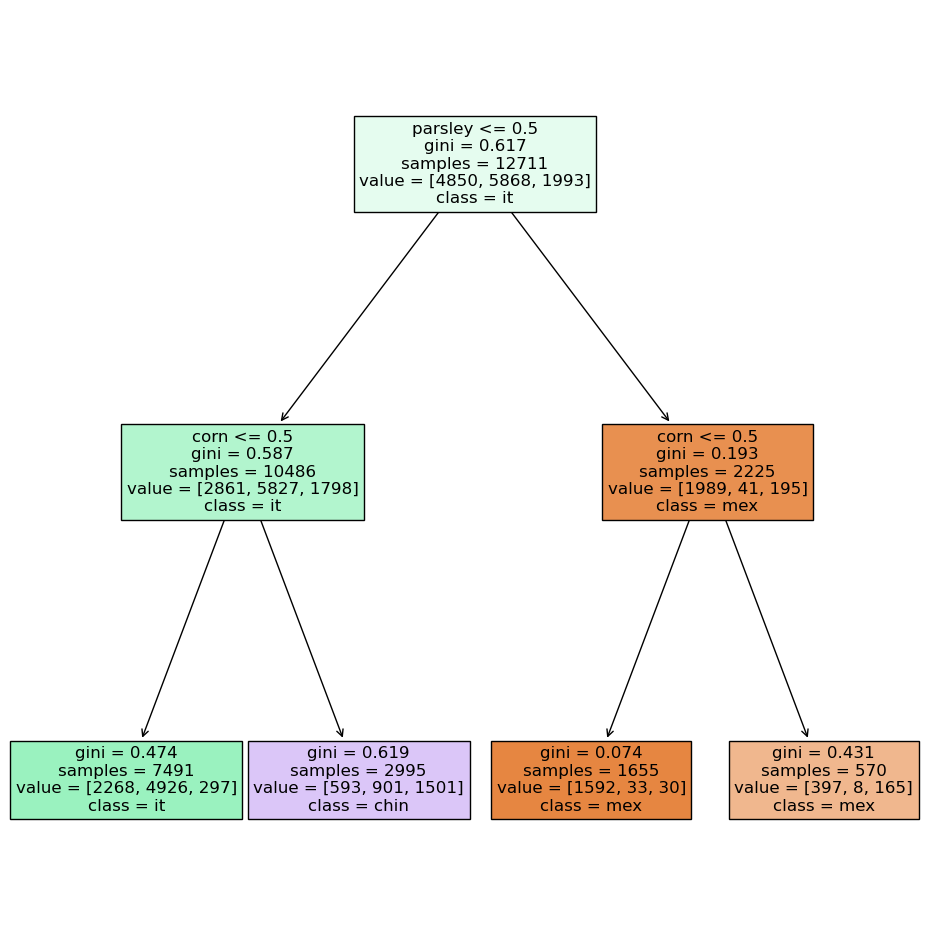

In [105]:
#plot details

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
plot_tree(model, fontsize=12, filled=True, class_names=["mex","it","chin"], feature_names = ['ID_recipe','cuisine','tomatoes','basil','parsley','wine','cilantro','chili','corn','ice','sauce','scallions'])
plt.show()
#the darker the color background, the higher the probabilty for the respective classification.

# 5: Ideas on similarities of country cuisines

Clustering approach. This again requires a suitable preparation of the data. 

Question: On what basis is the similarity made out? 

Ideas:
- Specify per ingredient, in what percentage of the recipes the ingredient is contained --> get value in [0,1].
- Give the same value in absolute sum, gives then still over the quantity of the recipes information